In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

F:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("Placement_Data.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.drop(['sl_no'], inplace=True, axis=1)

In [4]:
df.salary.fillna(0, inplace=True)

## How many Students are Placed and Not Placed? 

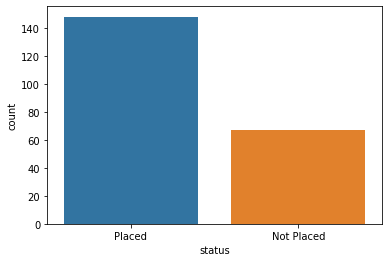

In [5]:
sns.countplot(df['status'])

Almost 150 student were Placed whereas almost 60 to 70 persons were not placed

In [6]:
def plot(data, x, y):
    
    plt.Figure(figsize=(10,10))
    
    sns.boxplot(x = data[y], y= data[x])
    
    g = sns.FacetGrid(data, row = y)
    g = g.map(plt.hist, x)
    
    plt.show()

## Who is getting more placements girls or boys?

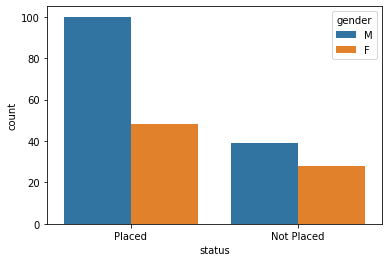

In [7]:
sns.countplot(df['status'], hue=df['gender'])

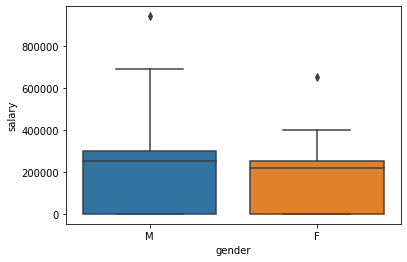

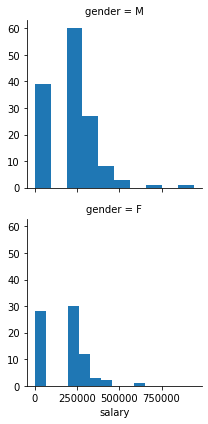

In [8]:
plot(df, "salary", "gender")

#### From the above plot I can infer the following details:

1. The Range of salary is high for boys with the median of 2.5 Lakhs per annum.
2. The Median salary for girls is 2.1 Lakhs per annum.
3. The highest package is offered to a boy which is nearly 10 Lakhs per annum.
4. The highest package offered for girls is 7 Lakhs per annum.


***Total number girls not placed are 30(almost) and Total number of boys not placed are 40(almost).***



The Boys are getting more placements and the ratio of boys to girls(placements) is about 100:50, that can be seen from the plot given below:

## To get placed in a company with high package which board should I choose (Central or State board) in 10th?

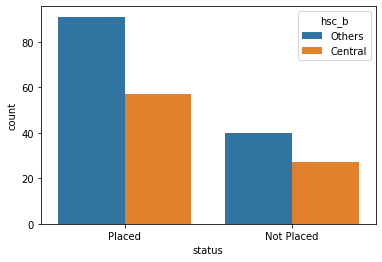

In [9]:
sns.countplot(df['status'], hue=df['hsc_b'])

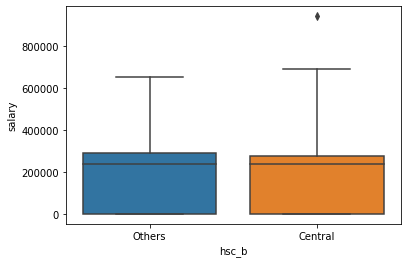

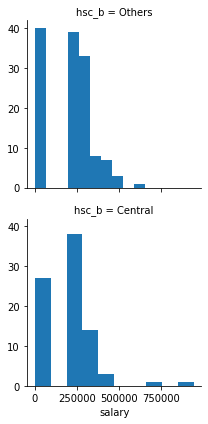

In [10]:
plot(df, "salary", "hsc_b")

### From the above plot I can infer the following details:

1. The Range of salary is high for **central** board students with the median of 2.5 Lakhs per annum.
2. The Median salary for **other** board students is 2.3 Lakhs per annum.
3. The **highest package** is offered to a **central board** students which is nearly 10 Lakhs per annum and as per our previous finding the student is a boy.
4. The highest package offered for other board students is 5 Lakhs per annum.


***Total number central board students not placed are 28 and Total number of other board student not placed are 37.***

Better to choose central board but the ratio is 80:70 which infers thats both the board students are getting placed and ratio of student not getting placed is 35:25 here central board students are more, so the 10th board selection doesn't matters but if you want high package go for central board...(See the plot given below for more clarity).

## To get placed in a company with high package which board should I choose (Central or State board) in 12th?

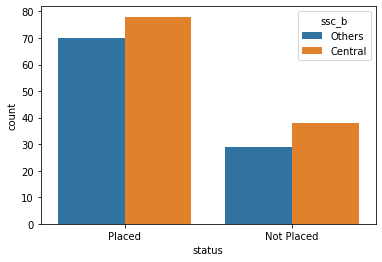

In [11]:
sns.countplot(df['status'], hue=df['ssc_b'])

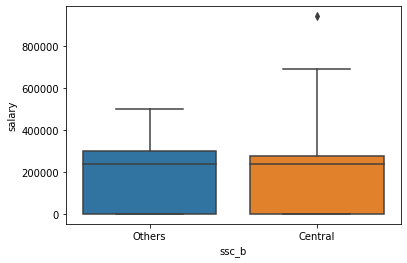

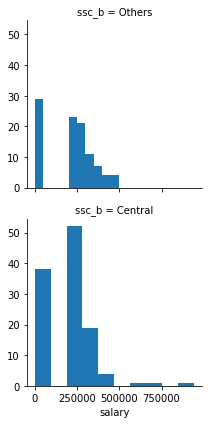

In [12]:
plot(df, "salary", "ssc_b")

### From the above plot I can infer the following details:

1. The Range of salary is high for central board students with the median of 2.5 Lakhs per annum
2. The Median salary for other board students is 2.4 Lakhs per annum
3. The highest package is offered to a central board student which is nearly 10 Lakhs per annum and as per our previous finding the student is a boy and also his 10th board is central board
4. The highest package offered for other board students is 7 Lakhs per annum

Total number central board students not placed are 25 and Total number of other board student not placed are 40.

Better to choose other board and ratio is 90:50 which infers thats the other board students are getting more placed and ratio of student not getting placed is 40:25 here central board students are less which infers that most of them will get offers.If you want high package go for central board...(See the plot given below for more clarity)

## Which stream students are getting more placed and which stream students are mostly not placed?

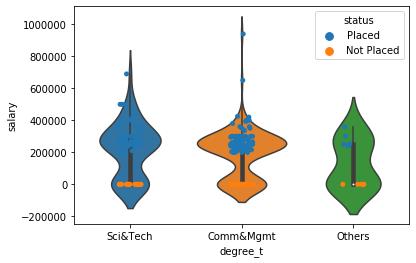

In [13]:
sns.violinplot(x="degree_t", y="salary", data=df)
sns.stripplot(x=df["degree_t"], y=df["salary"], hue=df['status'])

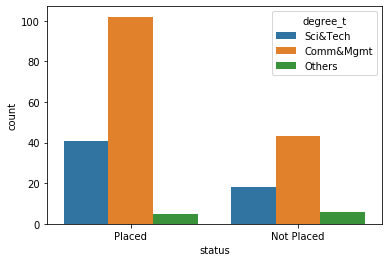

In [14]:
sns.countplot(df['status'], hue=df['degree_t'])

The stream in which the students mostly get placed are Commucation and management , also science and technology students are mostly getting placed and other stream students are not getting that much placements due to less number of students...

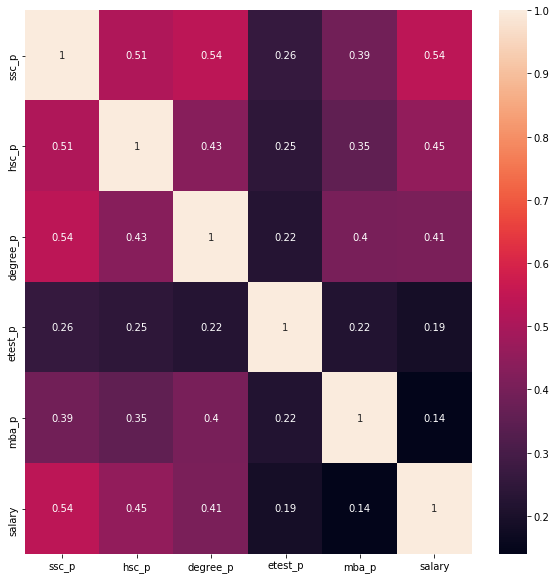

In [15]:
plt.figure(figsize =(10, 10))
sns.heatmap(df.corr(), annot=True)

In [16]:
cor = df.corr()
cor.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

In [17]:
df.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [18]:
list1 = []
for i in cor.columns:
    for j in cor.columns :
        if abs(cor[i][j])>0.5 and i!=j:
            list1.append(i)
            list1.append(j)
print(list1)

['ssc_p', 'hsc_p', 'ssc_p', 'degree_p', 'ssc_p', 'salary', 'hsc_p', 'ssc_p', 'degree_p', 'ssc_p', 'salary', 'ssc_p']


### Who is mostly not getting placed?

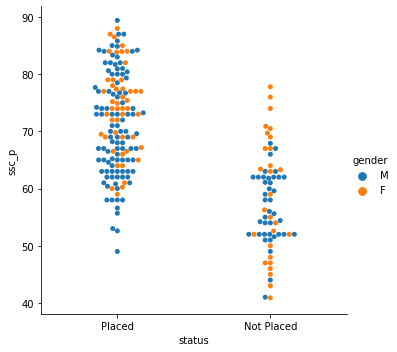

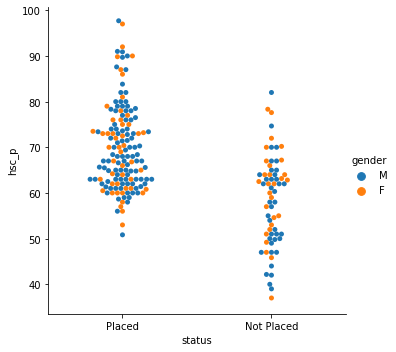

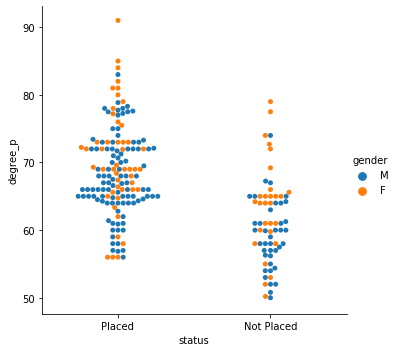

In [19]:
sns.catplot(x="status", y="ssc_p", data=df,kind="swarm",hue='gender')
sns.catplot(x="status", y="hsc_p", data=df,kind="swarm",hue='gender')
sns.catplot(x="status", y="degree_p", data=df,kind="swarm",hue='gender')

The students who have scored less than 60 percent in 10th or 12th or degree are mostly not getting placed because they don't even have basic eligibility(more than 60 percent in 10th,12th and degree)

### Are the students who are doing well in 10th , doing good in 12th?

Pearsons correlation: 0.511


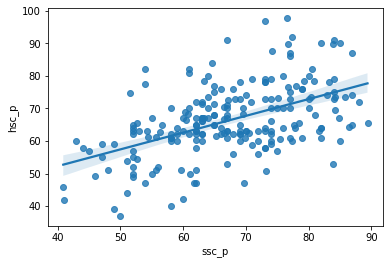

In [20]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['ssc_p'], df['hsc_p'])
print('Pearsons correlation: %.3f' % corr)
sns.regplot(x='ssc_p',y='hsc_p',data = df)

The correlation is 0.51 which is not too strong but with the plot i can infer that those who performed well in 10th have performed well in 12th also and the outlier to this concept is very less and those whose scored less than 60 in 10th have continued the same in 12th and the student other than that two category have improved from 10th to 12th in point of marks

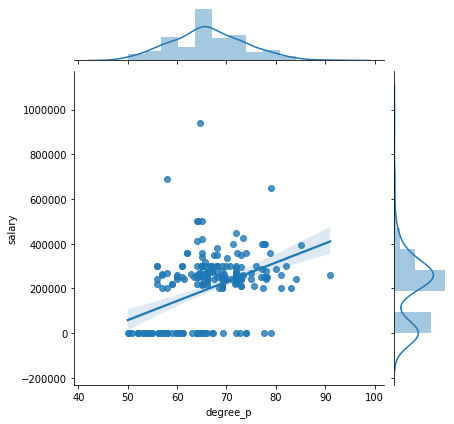

In [21]:
sns.jointplot(x="degree_p",y="salary", data=df, kind= "regplot")

In [22]:
corr, _ = pearsonr(df['salary'], df['degree_p'])
print(corr)

0.4083707811765697


The correlation is very less, so the degree percentage doesn't play a vital role in getting placements or in otherwords if you have enough skills with average percentage surely you will be placed,as in the plot above we can see that the highest package is offerred to student with 65 percent not to the student with 90 percent

## Plotting the Relationships between numerical columns

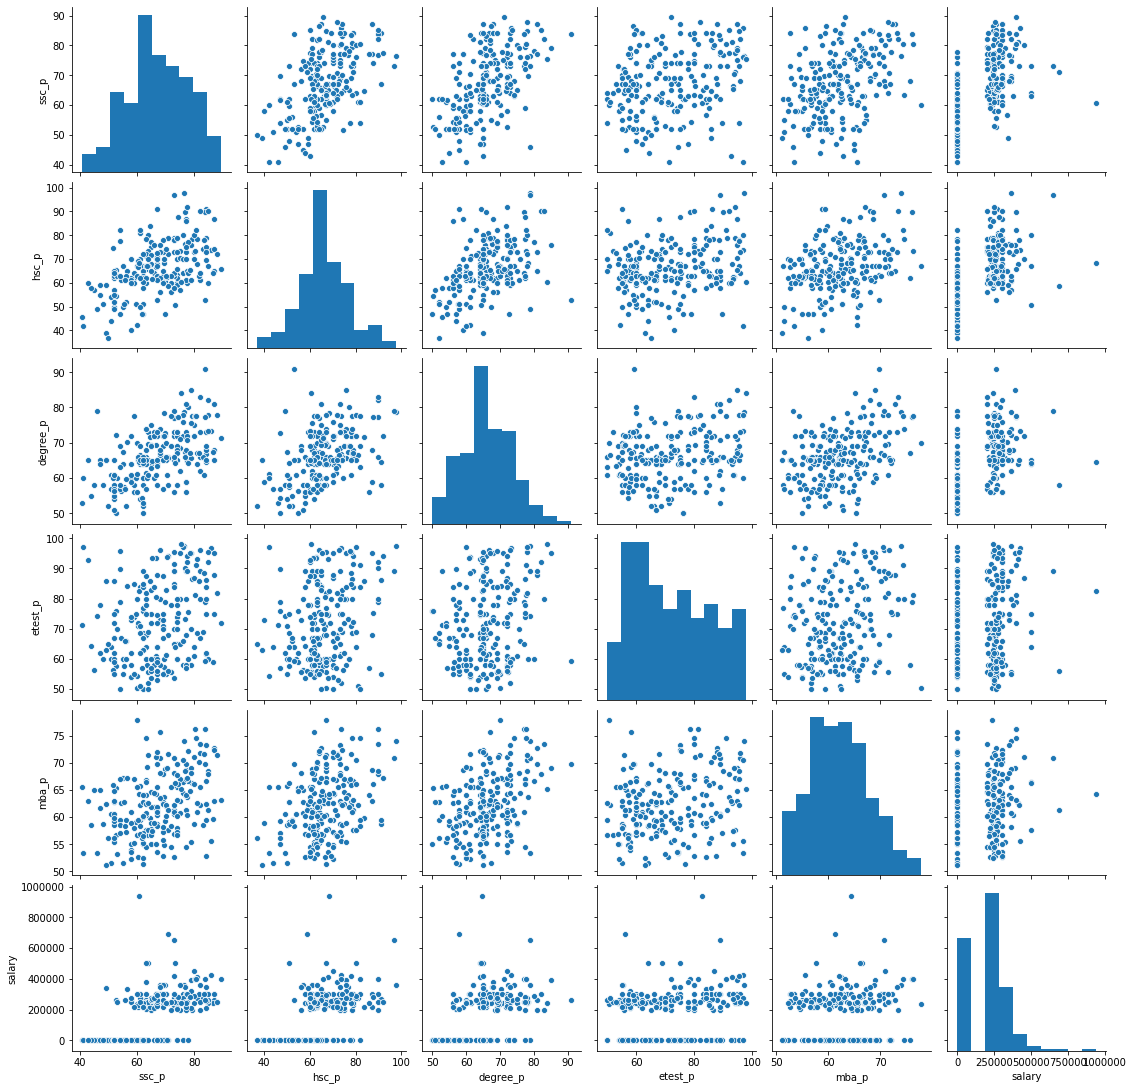

In [23]:
sns.pairplot(df)

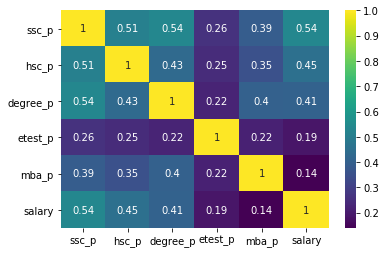

In [24]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [25]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [26]:
columns_needed =['gender','ssc_p','ssc_b','hsc_b','hsc_p','degree_p','degree_t']
y=df.status
salary=df.salary
df = df[columns_needed]
df.head()

,gender,ssc_p,ssc_b,hsc_b,hsc_p,degree_p,degree_t
0,M,67.00,Others,Others,91.00,58.00,Sci&Tech
1,M,79.33,Central,Others,78.33,77.48,Sci&Tech
2,M,65.00,Central,Central,68.00,64.00,Comm&Mgmt
3,M,56.00,Central,Central,52.00,52.00,Sci&Tech
4,M,85.80,Central,Central,73.60,73.30,Comm&Mgmt


In [27]:
cat_features=[]

for feature in df.columns:
    
    if(df[feature].dtypes=='object'):
        cat_features.append(feature)
        
set(cat_features)

{'degree_t', 'gender', 'hsc_b', 'ssc_b'}

In [28]:
df.head()

,gender,ssc_p,ssc_b,hsc_b,hsc_p,degree_p,degree_t
0,M,67.00,Others,Others,91.00,58.00,Sci&Tech
1,M,79.33,Central,Others,78.33,77.48,Sci&Tech
2,M,65.00,Central,Central,68.00,64.00,Comm&Mgmt
3,M,56.00,Central,Central,52.00,52.00,Sci&Tech
4,M,85.80,Central,Central,73.60,73.30,Comm&Mgmt


In [29]:
df[cat_features].head()

,gender,ssc_b,hsc_b,degree_t
0,M,Others,Others,Sci&Tech
1,M,Central,Others,Sci&Tech
2,M,Central,Central,Comm&Mgmt
3,M,Central,Central,Sci&Tech
4,M,Central,Central,Comm&Mgmt


In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
le=LabelEncoder()
sc=MinMaxScaler()
le

LabelEncoder()

In [31]:
y=pd.DataFrame(le.fit_transform(y), columns=['status'])
y.head()

,status
0,1
1,1
2,1
3,0
4,1


In [32]:
X=df.copy()

## Getting Dummies
for feature in cat_features:
    
    dummy_df=pd.get_dummies(X[feature])
    del dummy_df[dummy_df.columns[-1]]
    X=pd.concat([X, dummy_df], axis=1)
X.drop(['gender','ssc_b','hsc_b','degree_t'],inplace =True,axis =1)
X.head()

,ssc_p,hsc_p,degree_p,F,Central,Central,Comm&Mgmt,Others
0,67.00,91.00,58.00,0,0,0,0,0
1,79.33,78.33,77.48,0,1,0,0,0
2,65.00,68.00,64.00,0,1,1,1,0
3,56.00,52.00,52.00,0,1,1,0,0
4,85.80,73.60,73.30,0,1,1,1,0


In [33]:
# X=pd.DataFrame(sc.fit_transform(X), columns=X.columns)
# X.head()

In [34]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.2)

In [35]:
from sklearn.tree import DecisionTreeClassifier as DTC
model = DTC()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(model, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
# plt.figure(figsize=(100,70))
# Image(graph.create_png())
# plt.imshow(graph)

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model.predict(X_test)))

0.8372093023255814


In [38]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=12)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
model.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model.predict(X_test)))

0.8604651162790697


C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
